In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
fraud= pd.read_csv('/content/sample_data/Fraud_check.csv')

In [4]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
##Converting the Taxable income variable to bucketing. 
#fraud["income"]="<=30000"
fraud.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [7]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [8]:
fraud.drop(["Taxable.Income"],axis=1,inplace=True)

In [9]:
le=preprocessing.LabelEncoder()
for column_name in fraud.columns:
    if fraud[column_name].dtype == object:
        fraud[column_name] = le.fit_transform(fraud[column_name])
    else:
        pass

In [12]:
fraud.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [23]:
features = fraud.iloc[:,0:5]
labels = fraud.iloc[:,5]

In [14]:
from sklearn.preprocessing import StandardScaler

In [31]:
stdscaler=StandardScaler()
features_std=stdscaler.fit_transform(features)

In [32]:
colnames = list(fraud.columns)
predictors = colnames[0:5]
target = colnames[5]

In [33]:
x_train,x_test,y_train,y_test = train_test_split(features_std,labels,test_size = 0.2,random_state=10)

# **Building Decision Tree Classifier using Entropy Criteria**

In [34]:
model = DecisionTreeClassifier(max_depth=3,criterion = "entropy")
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

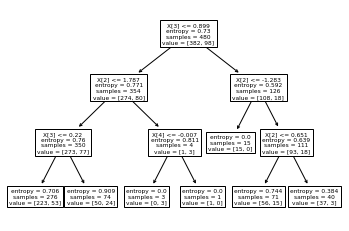

In [45]:
tree.plot_tree(model);

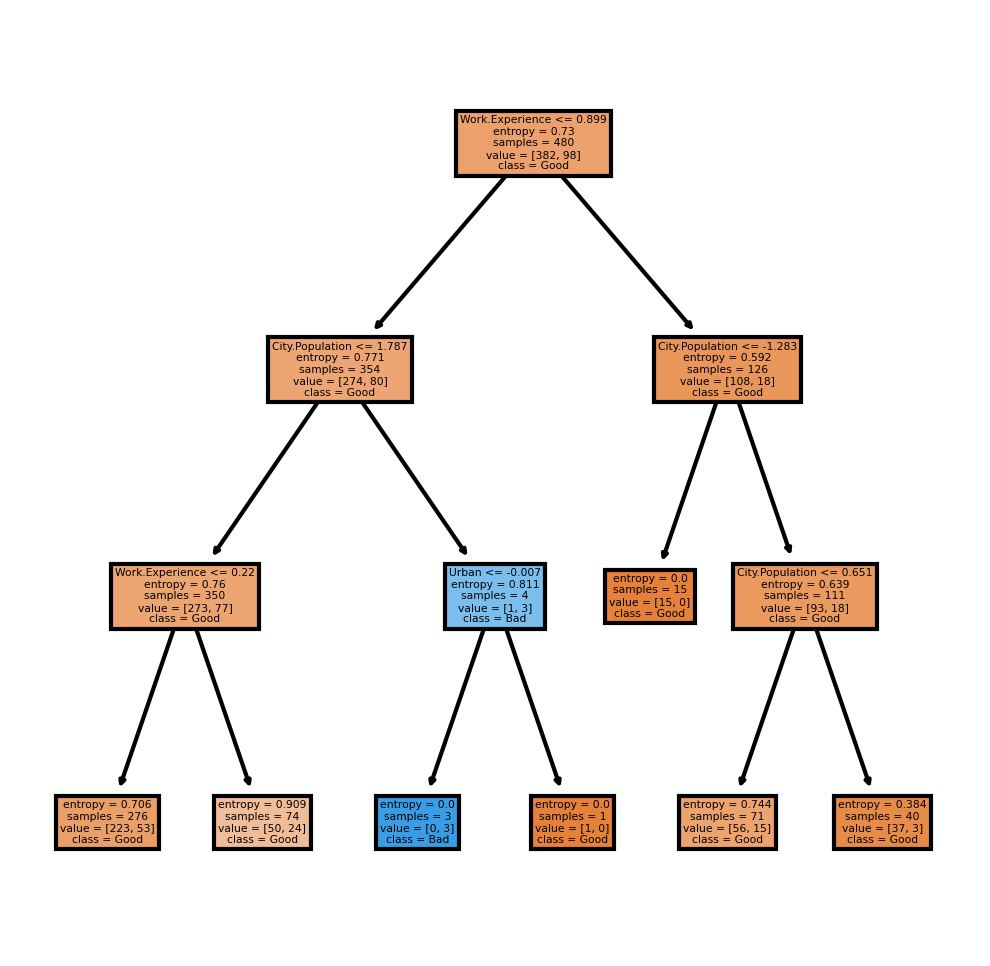

In [52]:
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = predictors, 
               class_names=['Good','Bad'],
               filled = True);

In [35]:
model.n_classes_

2

In [36]:
model.score(x_test,y_test)

0.775

In [37]:
prediction = model.predict(x_train)

In [38]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)
accuracy

0.8020833333333334

In [39]:
np.mean(prediction == y_train)

0.8020833333333334

In [40]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)
confusion

array([[382,   0],
       [ 95,   3]])

In [41]:
pred_test = model.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,pred_test)
accuracy

0.775

In [43]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87        94
           1       0.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.61      0.78      0.68       120



# **Building Decision Tree Classifier (CART) using Gini Criteria**

In [54]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [55]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [56]:
#Prediction and computing the accuracy
preds1=model_gini.predict(x_test)
np.mean(preds1==y_test)

0.775

In [57]:
pred_test = model_gini.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,pred_test)
accuracy

0.775